# Praca Domowa nr 5

### Jacek Wiśniewski

## Wstęp
W tej pracy zajmę się problemem klasteryzacji. Przetestuję 2 metody klaseryzujące oraz 2 sposoby wybierania liczby klastrów.

In [118]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import os
import matplotlib.pyplot as plt

In [91]:
data = pd.read_csv("..\..\clustering.csv", header = None)

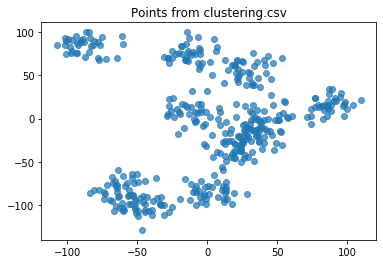

In [72]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha = 0.7)
plt.title("Points from clustering.csv")
plt.show()

## Kmeans
Pierwszą metodą będzie metoda k najbliższych średnich. Do wyboru liczby klastrów wykorzystam wykres inercji oraz zasadę "łokcia".

In [99]:
inertias = []
centroids = []
labels = []
for k in range(1, 21):
    model = KMeans(n_clusters = k)
    model.fit(data)
    inertias.append(model.inertia_)
    centroids.append(model.cluster_centers_)
    labels.append(model.predict(data))

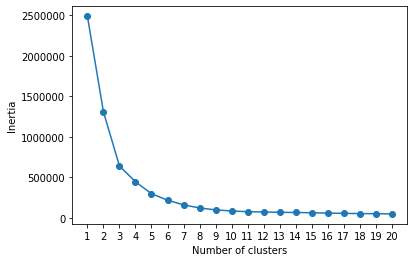

In [100]:
plt.plot(range(1, 21), inertias, '-o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(range(1, 21))
plt.show()

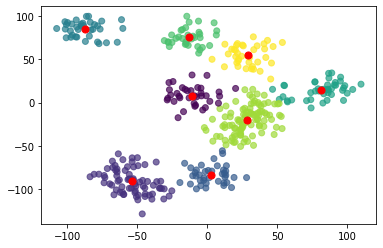

In [97]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha = 0.7, c = labels[7])
plt.scatter(centroids[7][:, 0], centroids[7][:, 1], s = 50, c = 'red')
plt.show()

## Agglomerative Clustering
Drugą metodą będzie klasteryzacja aglomeracyjna a do wyboru liczby klastrów wykorzystam miarę silhouette.

In [122]:
centroids = []
labels = []
scores = []
for k in range(2, 21):
    model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
    prediction = model.fit_predict(data)
    labels.append(prediction)
    
    clf = NearestCentroid()
    clf.fit(data, prediction)
    centroids.append(clf.centroids_)
    scores.append(silhouette_score(data, prediction))

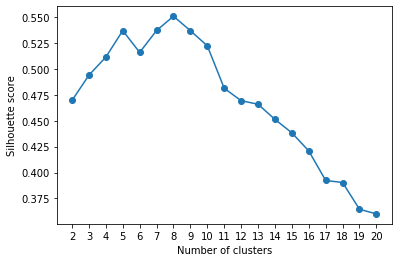

In [127]:
plt.plot(range(2, 21), scores, '-o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.xticks(range(2, 21))
plt.show()

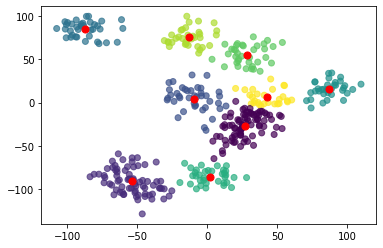

In [128]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], alpha = 0.7, c = labels[7])
plt.scatter(centroids[7][:, 0], centroids[7][:, 1], s = 50, c = 'red')
plt.show()

## Wnioski
Obie metody oraz miary są równoważne, ponieważ tworzą podobne (chociaż widocznie różniące się) klastry oraz sugerują wybór tej samej liczby klastrów. Moim zdaniem miara silhouette jest czytelniejsza od zasady "łokcia" i to zniej prawdopodobnie będę częściej korzystał w przyszłych projektach.